<a href="https://colab.research.google.com/github/254-KIPSANG/EDA--PYTHON/blob/main/swahili_semtiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install -q google-play-scraper
import pandas as pd
from google_play_scraper import reviews
from google_play_scraper import Sort

## top 20 apps
apps = {
    "Zenka": "com.zenkafinance.microloans",
    "cashpesa": "cash.pesa.loan.kenya",
    "meta": "com.metaloan",
}

SORT = Sort.NEWEST
N_REVIEWS = 10000
reviews_dict =  {k : {} for k in apps}

## Scraping reviews
for app in apps.keys():
    reviews_dict[app], _  = reviews(
         apps[app],
         lang='all',
         country='ke',
         sort= SORT,
         count=N_REVIEWS,
         filter_score_with=None
     )
    assert len(reviews_dict[app]) == N_REVIEWS

## saving reviews
df = pd.DataFrame()
for app in apps.keys():
    SAVE_DIR = app  + ".csv"
    temp_df = pd.DataFrame(
        reviews_dict[app],
        columns = ["reviewId", "content", "score", "reviewCreatedVersion", "at", "repliedAt", "replyContent", "user", "appVersion"]
    )
    temp_df.to_csv(SAVE_DIR, index = False)
    temp_df["app"] = app
    df = pd.concat((df ,temp_df))
df.to_csv("all_combined.csv", index = False)
print("DONE :) ")
df.head()


DONE :) 


,reviewId,content,score,reviewCreatedVersion,at,repliedAt,replyContent,user,appVersion,app
0,a4a70e99-7855-45c5-9bb6-e18a3e7a7347,Reliable. But open room for another loan fast ...,5,2.3.0+53b683fd.389,2024-02-18 17:15:58,2024-02-18 18:00:40,"Hi, thank you very much for your feedback.Keep...",NaN,2.3.0+53b683fd.389,Zenka
1,ec73391c-0825-415e-a21c-d7050ae64f7f,Best app,5,2.3.0+53b683fd.389,2024-02-18 16:00:13,2024-02-18 16:32:01,It is delightful to hear such positive words a...,NaN,2.3.0+53b683fd.389,Zenka
2,a830bd53-f184-4400-a9d7-82388246f7f0,Good,5,None,2024-02-18 15:31:54,2024-02-18 16:31:56,It is delightful to hear such positive words a...,NaN,None,Zenka
3,20fb6199-f9b0-4670-b9e9-e7001dee5e26,thanks for your,2,2.3.0+53b683fd.389,2024-02-18 15:29:47,2024-02-18 16:32:50,"Hi, If you enjoy using the app, please rate us...",NaN,2.3.0+53b683fd.389,Zenka
4,c91e33d0-5970-4cb6-96a1-d377c649268b,Very essential,5,2.3.0+53b683fd.389,2024-02-18 15:22:23,2024-02-18 16:31:38,It is delightful to hear such positive words a...,NaN,2.3.0+53b683fd.389,Zenka


In [27]:
print(data.columns)

Index(['reviewId', 'content', 'score', 'reviewCreatedVersion', 'at',
       'repliedAt', 'replyContent', 'user', 'appVersion', 'app'],
      dtype='object')


In [24]:
# Check for missing values
missing_values = data['content'].isnull().sum()
print("Number of missing values in 'content' column:", missing_values)

# Drop rows with missing values
data = data.dropna(subset=['content'])

# Convert all text to lowercase
data['content'] = data['content'].str.lower()

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['content'] = data['content'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Lemmatize each word
data['content'] = data['content'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

# Remove non-ASCII characters
data['content'] = data['content'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# Display the preprocessed DataFrame
print(data.head())


Number of missing values in 'content' column: 3


<ipython-input-24-3042c0b79cbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].str.lower()


                               reviewId  \
0  a4a70e99-7855-45c5-9bb6-e18a3e7a7347   
1  ec73391c-0825-415e-a21c-d7050ae64f7f   
2  a830bd53-f184-4400-a9d7-82388246f7f0   
3  20fb6199-f9b0-4670-b9e9-e7001dee5e26   
4  c91e33d0-5970-4cb6-96a1-d377c649268b   

                                             content  score  \
0  reliable. open room another loan fast delay on...      5   
1                                           best app      5   
2                                               good      5   
3                                             thanks      2   
4                                          essential      5   

  reviewCreatedVersion                   at            repliedAt  \
0   2.3.0+53b683fd.389  2024-02-18 17:15:58  2024-02-18 18:00:40   
1   2.3.0+53b683fd.389  2024-02-18 16:00:13  2024-02-18 16:32:01   
2                  NaN  2024-02-18 15:31:54  2024-02-18 16:31:56   
3   2.3.0+53b683fd.389  2024-02-18 15:29:47  2024-02-18 16:32:50   
4   2.3.0+53b683fd.389

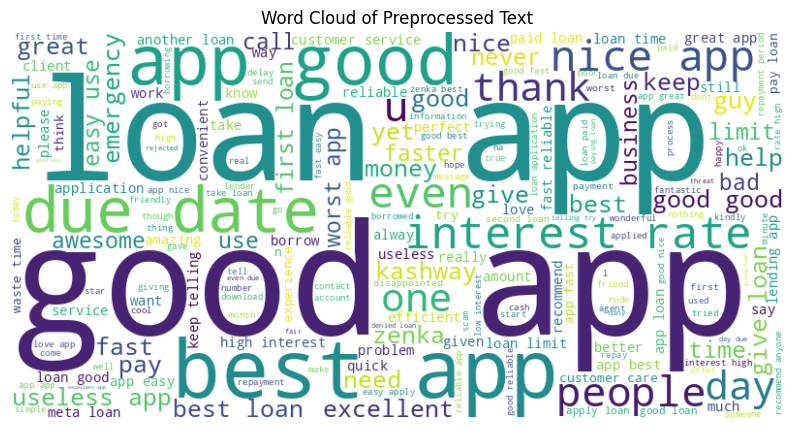

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all preprocessed text data into a single string
text = ' '.join(data['content'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Preprocessed Text')
plt.axis('off')
plt.show()


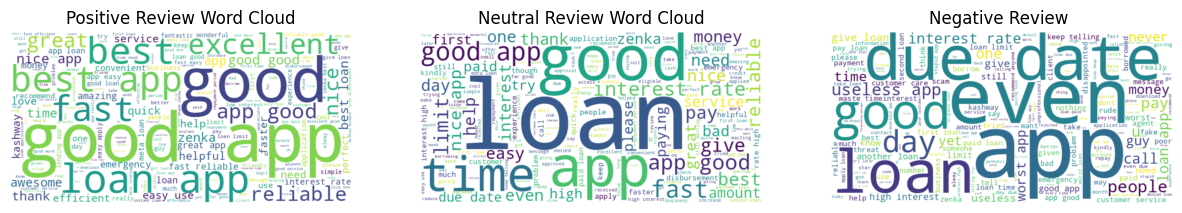

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define thresholds for positive, neutral, and negative scores
positive_threshold = 4
negative_threshold = 2

# Categorize words based on review scores
positive_text = ' '.join(data[data['score'] >= positive_threshold]['content'])
neutral_text = ' '.join(data[(data['score'] > negative_threshold) & (data['score'] < positive_threshold)]['content'])
negative_text = ' '.join(data[data['score'] <= negative_threshold]['content'])

# Generate word clouds for each sentiment category
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word clouds for each sentiment category
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Review Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Review Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Review ')
plt.axis('off')

plt.show()


<Figure size 1200x800 with 0 Axes>

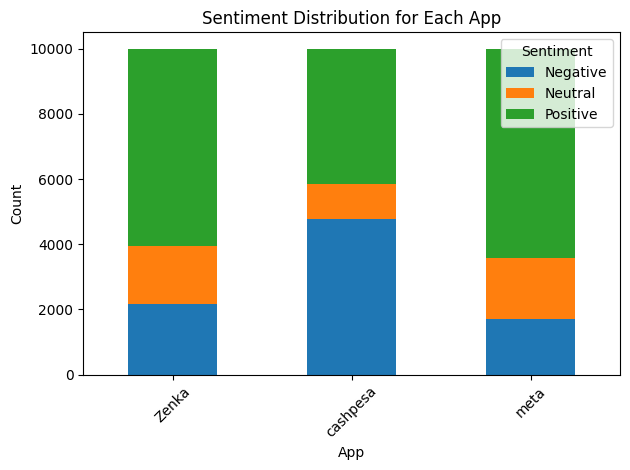

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define thresholds for positive, neutral, and negative scores
positive_threshold = 4
negative_threshold = 2

# Categorize sentiments based on review scores
data['sentiment'] = pd.cut(data['score'], bins=[0, negative_threshold, positive_threshold, 5], labels=['Negative', 'Neutral', 'Positive'])

# Group the data by 'app' and 'sentiment', and count the occurrences
sentiment_counts = data.groupby(['app', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment distribution for each app
plt.figure(figsize=(12, 8))
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution for Each App')
plt.xlabel('App')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


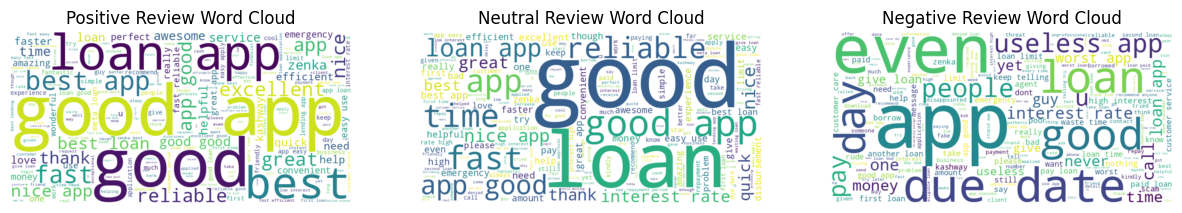

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Categorize words based on sentiment
positive_text = ' '.join(data[data['sentiment'] == 'Positive']['content'])
neutral_text = ' '.join(data[data['sentiment'] == 'Neutral']['content'])
negative_text = ' '.join(data[data['sentiment'] == 'Negative']['content'])

# Generate word clouds for each sentiment category
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word clouds for each sentiment category
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Review Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Review Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Review Word Cloud')
plt.axis('off')

plt.show()


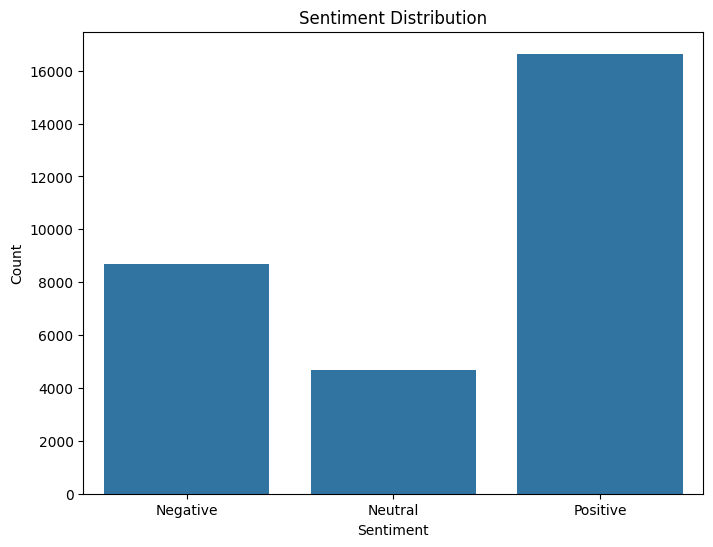

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


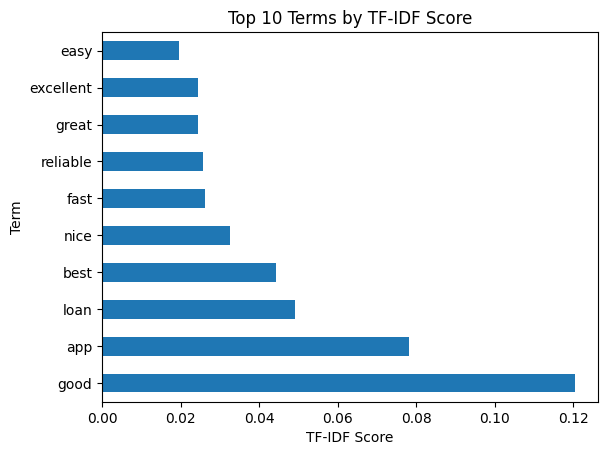

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF scores
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['content'])

# Visualize TF-IDF scores for top N terms
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_means = tfidf_df.mean().sort_values(ascending=False)[:10]
tfidf_means.plot(kind='barh')
plt.title('Top 10 Terms by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.show()


In [49]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

# Train Word2Vec model
word2vec_model = Word2Vec(data['content'].apply(lambda x: x.split()), min_count=1, size=100, workers=3)
word_vectors = word2vec_model.wv

# Visualize word embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors[word_vectors.vocab])
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='.')
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


TypeError: Word2Vec.__init__() got an unexpected keyword argument 'size'